In [6]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from utils.kernelDensityEst import KernelDensityEstimator
from utils.integral import grid

In [8]:
np.random.seed(0)
N = 100
f2_data = np.hstack([
    np.random.normal(loc=0, scale=1, size=N // 3),
    np.random.normal(loc=5, scale=1, size=2 * N // 3)
])

x_grid = grid(0.01, start = -8, end = 15)
h = 1.06 * np.std(f2_data) * N ** (-1 / 5)  # bandwidth Silverman's rule

f1_data = true_pdf = 1 / 3 * norm.pdf(x_grid, loc=0, scale=1) + 2 / 3 * norm.pdf(x_grid, loc=5, scale=1)

kernel_names = ['gaussian', 'epanechnikov', 'logistic']

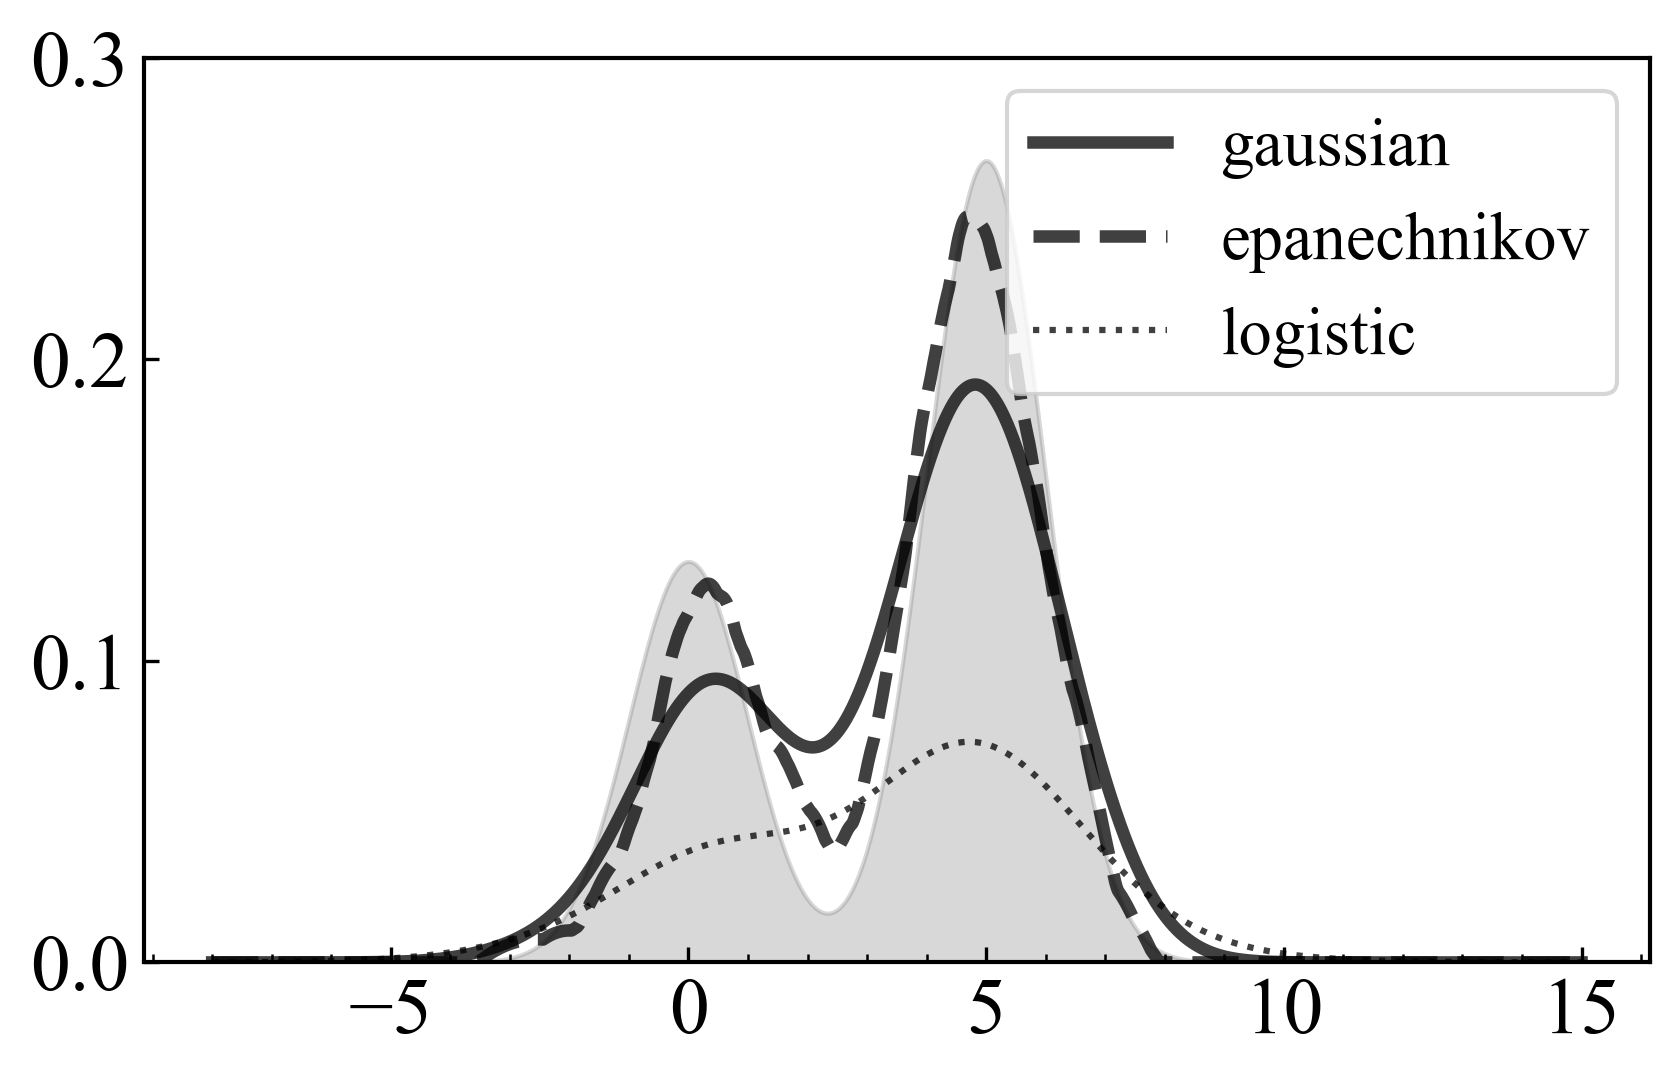

In [9]:
# === Vẽ ===
from utils.vis import temp
plt.figure(figsize=(6, 4))
temp(20)

plt.fill_between(x_grid, true_pdf, color='gray', alpha=0.3)

for name in kernel_names:
    kde = KernelDensityEstimator(bandwidth=h, kernel=name)
    kde.fit(f2_data)
    y_kde = kde.evaluate(x_grid)

    if name == 'gaussian':
        ls, lw = '-', 3
    elif name == 'epanechnikov':
        ls, lw = '--', 3
    elif name == 'logistic':
        ls, lw = ':', 1.5

    plt.plot(x_grid, y_kde, color='black', linestyle=ls, linewidth=lw, alpha=0.75, label=name)

plt.legend(loc='upper right', fontsize=16)
plt.ylim(0, 0.3)
plt.tight_layout()

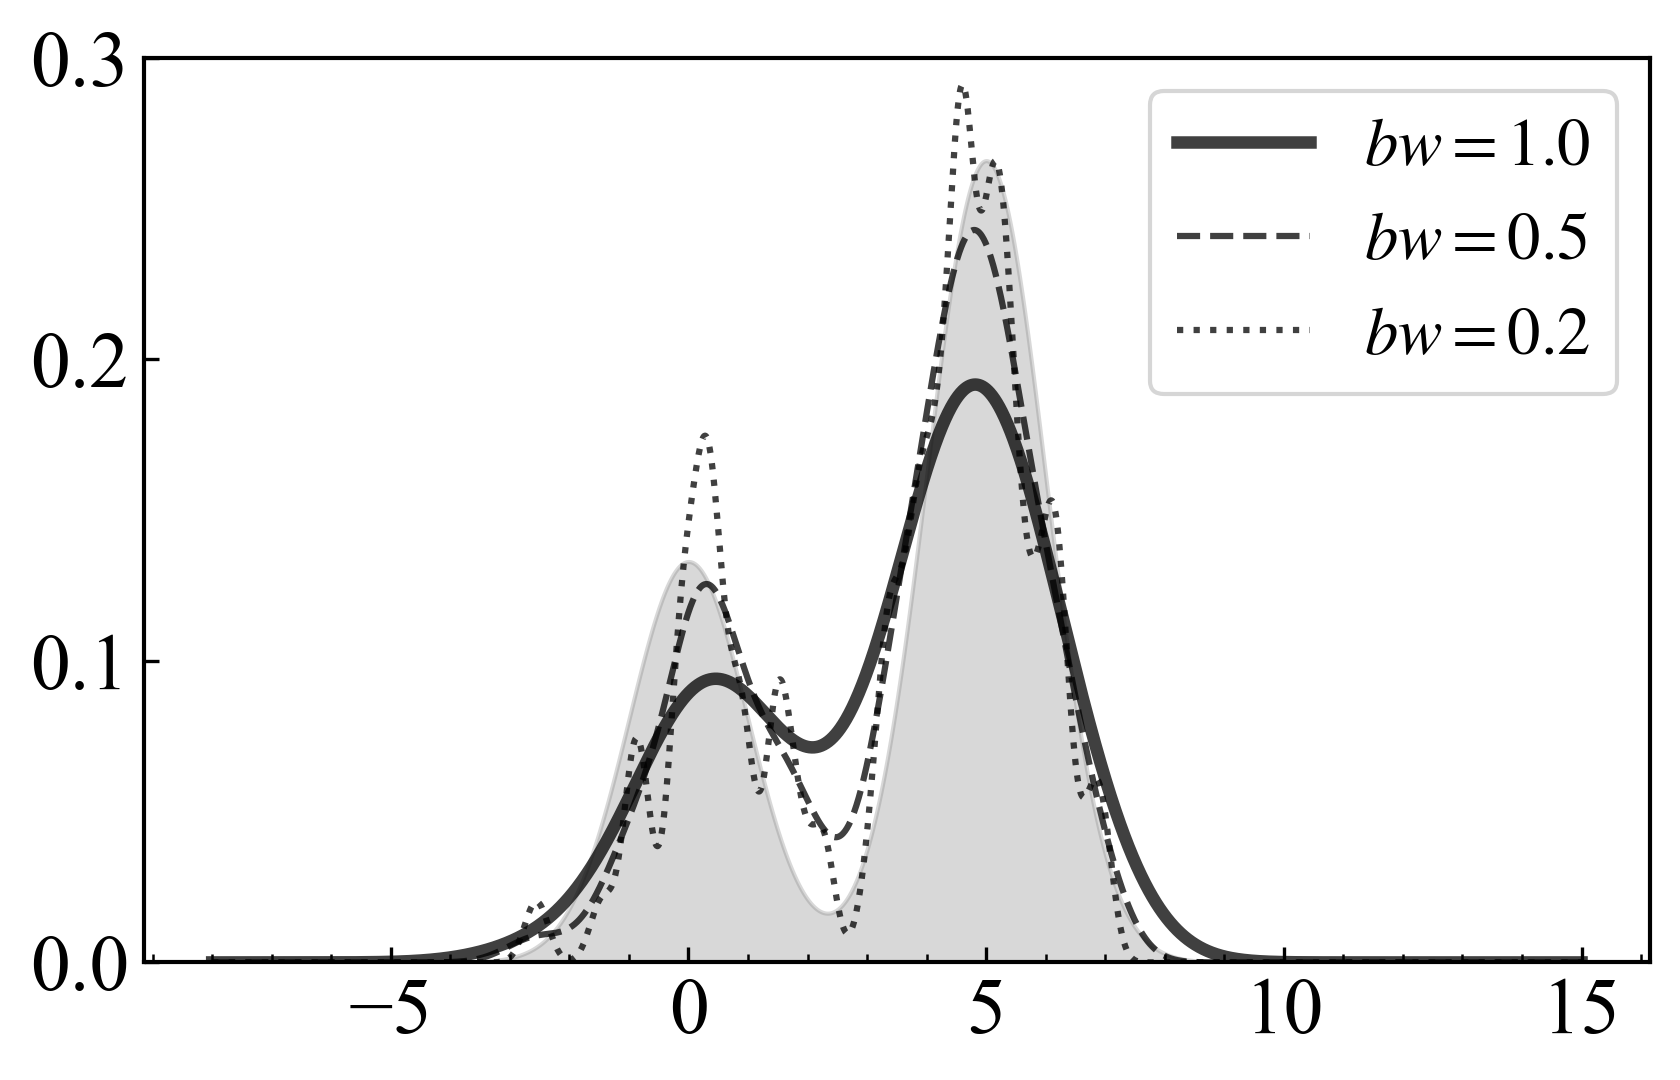

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# === Giả định bạn đã có các biến sau ===
# x_grid: np.ndarray 1D, các điểm lưới
# true_pdf: np.ndarray 1D, giá trị PDF thật tại x_grid
# f2_data: np.ndarray 1D, dữ liệu mẫu

# === Khởi tạo đối tượng KDE ===
kde_estimator = KernelDensityEstimator()

# === Vẽ ===
plt.figure(figsize=(6, 4))

# Vẽ PDF thật
plt.fill_between(x_grid, true_pdf, color='gray', alpha=0.3)

# Các bandwidth và style
h_run = [h,0.5,.2]
linestyles = ['-', '--', ':']
linewidths = [3, 1.5, 1.5]

for h, ls, lw in zip(h_run, linestyles, linewidths):
    kde = KernelDensityEstimator(bandwidth=h, kernel='gaussian')
    kde.fit(f2_data)
    y_kde = kde.evaluate(x_grid)

    plt.plot(x_grid, y_kde, color='black', linestyle=ls, linewidth=lw, alpha=0.75, label=rf'$bw={h:.1f}$')

plt.legend(loc='upper right', fontsize=16)
plt.ylim(0, 0.3)
plt.tight_layout()
plt.savefig('C1_kde_bw.pdf')
plt.show()